In [1]:
# Importing libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torchsummary import summary
from torch import optim

In [2]:
# Setting seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

In [3]:
# Reading data
data = pd.read_csv('Dataset/archive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Plots
#### 1] Countplot

<AxesSubplot:xlabel='Species', ylabel='count'>

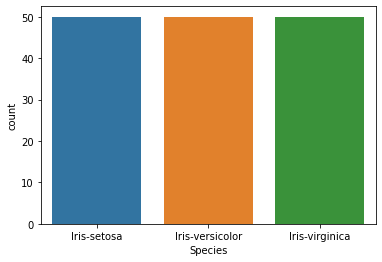

In [4]:
import seaborn as sns
sns.countplot(x = 'Species', data = data)

In [5]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

<AxesSubplot:ylabel='Species'>

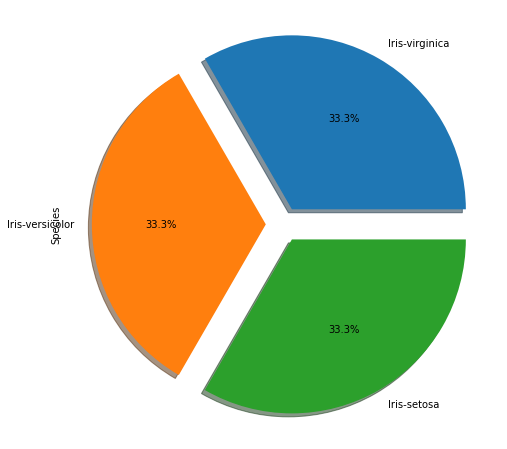

In [6]:
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct = '%1.1f%%',shadow=True,figsize=(10,8))

#### Distribution plot

In [7]:
data1 = data.copy()
data1 = data1.drop(['Id'], axis = 1)

<IPython.core.display.Javascript object>

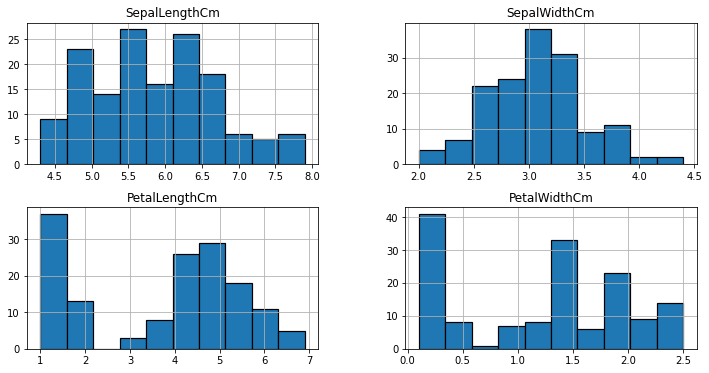

In [8]:
data1.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)

#### Heat map

<IPython.core.display.Javascript object>

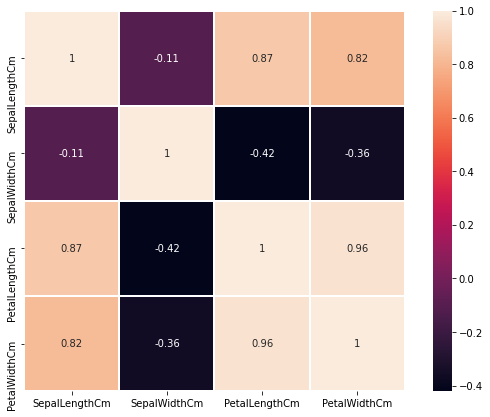

In [9]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data1.corr(), annot=True,
                linewidths=1,
                square=True)

#### Box plots and Strip plots

<IPython.core.display.Javascript object>

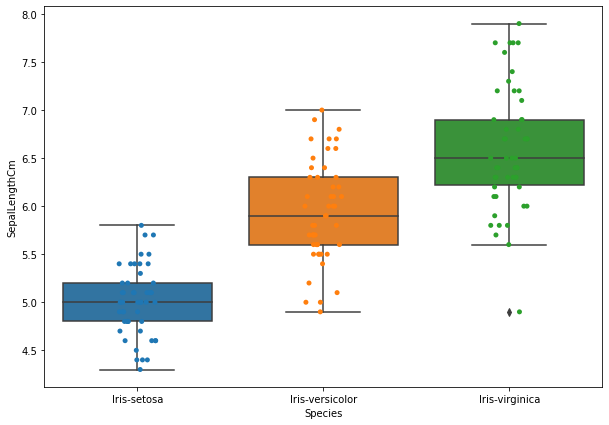

In [10]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=data)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=data,jitter=True,edgecolor='gray')

<IPython.core.display.Javascript object>

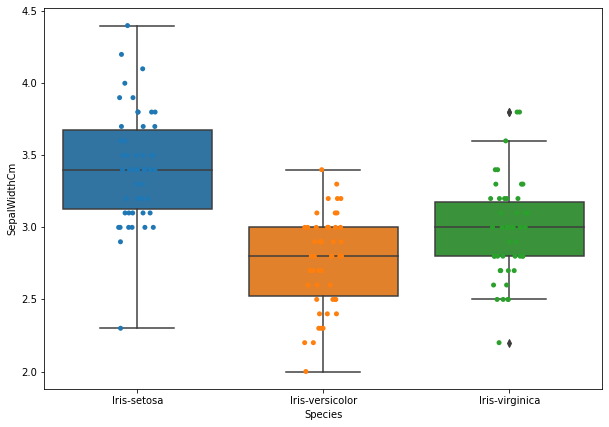

In [11]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalWidthCm',data=data)
fig=sns.stripplot(x='Species',y='SepalWidthCm',data=data,jitter=True,edgecolor='gray')

<IPython.core.display.Javascript object>

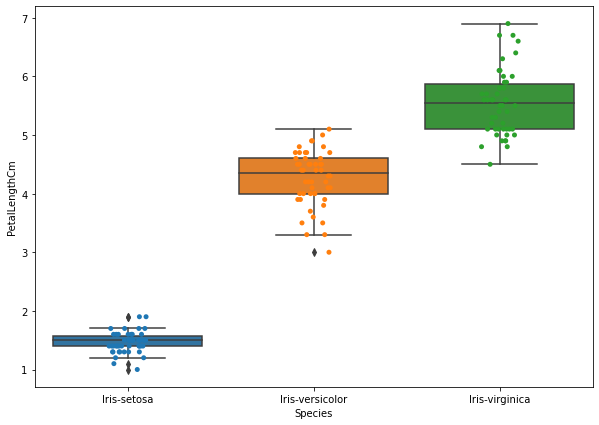

In [12]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=data)
fig=sns.stripplot(x='Species',y='PetalLengthCm',data=data,jitter=True,edgecolor='gray')

<IPython.core.display.Javascript object>

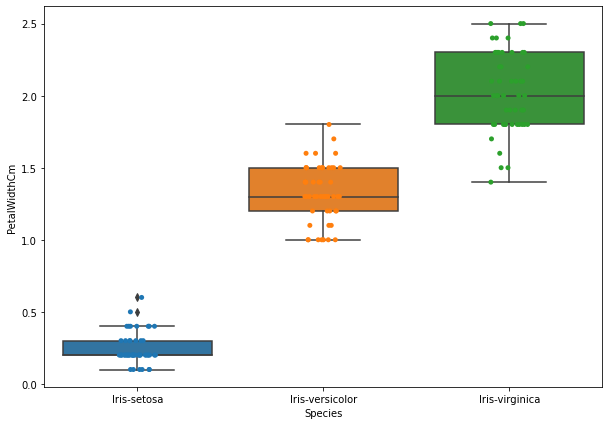

In [13]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig=sns.boxplot(x='Species',y='PetalWidthCm',data=data)
fig=sns.stripplot(x='Species',y='PetalWidthCm',data=data,jitter=True,edgecolor='gray')

# Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
def split(X, y, test_size, val_size, shuffle):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, shuffle = shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, stratify = y_train, shuffle = shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [16]:
TRAIN_SIZE = 0.70
TEST_SIZE = 0.15
VAL_SIZE = 0.15
SHUFFLE = True

In [17]:
X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, TEST_SIZE, VAL_SIZE, SHUFFLE)

In [18]:
print(f'Number of data points is sets :\n')
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'X_val : {X_val.shape}, y_val : {y_val.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

Number of data points is sets :

X_train : (107, 4), y_train : (107,)
X_val : (20, 4), y_val : (20,)
X_test : (23, 4), y_test : (23,)


In [19]:
print(f'Sample point : {X_train[0]} --> {y_train[0]}')

Sample point : [5.1 3.8 1.5 0.3] --> Iris-setosa


In [20]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [21]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# Encoding

In [22]:
# Before this we only worked with numerical data but now we have labels which are in text.
# So, we will need to convert this to numeric form.
# For converting labels to numeric form there is one method called 'LabelEncoder' in sklearn, we will apply that.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
# fitting on train data
y_le = le.fit(y_train)
classes = y_le.classes_

In [24]:
# Convert labels to tokens
# Before transforming
print(f'y_train[0] : {y_train[0]}')
y_train = y_le.transform(y_train)
y_val = y_le.transform(y_val)
y_test = y_le.transform(y_test)
print(f'y_train[0] : {y_train[0]}')

y_train[0] : Iris-setosa
y_train[0] : 0


# STANDARDIZE THE DATA

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler().fit(X_train)

In [27]:
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [29]:
import torch.nn.functional as F

In [30]:
from torch import nn
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_classes)
        
        
    def forward(self, x_in, apply_softmax = False):
        y_pred = self.fc1(x_in)
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim = 1)
        return y_pred

In [31]:
INPUT_DIM = X_train.shape[1]
NUM_CLASSES = len(classes)

In [32]:
model = LogisticRegression(input_dim = INPUT_DIM, num_classes = NUM_CLASSES)
print(model.named_parameters)
summary(model, input_size=(INPUT_DIM,))

<bound method Module.named_parameters of LogisticRegression(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
)>
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            15
Total params: 15
Trainable params: 15
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            15
Total params: 15
Trainable params: 15
Non-trainable params: 0

# Loss

In [33]:
loss_fn = nn.CrossEntropyLoss()

In [34]:
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

# Optimizer

In [35]:
learning_rate = 1e-1
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [36]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

# Training

In [37]:
EPOCHS = 100
for epoch in range(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%10==0: 
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 1.42, accuracy: 0.0
Epoch: 10 | loss: 0.35, accuracy: 81.6
Epoch: 20 | loss: 0.24, accuracy: 88.3
Epoch: 30 | loss: 0.18, accuracy: 98.1
Epoch: 40 | loss: 0.15, accuracy: 98.1
Epoch: 50 | loss: 0.13, accuracy: 97.1
Epoch: 60 | loss: 0.11, accuracy: 97.1
Epoch: 70 | loss: 0.11, accuracy: 97.1
Epoch: 80 | loss: 0.10, accuracy: 97.1
Epoch: 90 | loss: 0.09, accuracy: 97.1


In [38]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Confusion matrix

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """Plot a confusion matrix using ground truth and predictions."""
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #  Figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Axis
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    ax.xaxis.set_label_position('bottom') 
    ax.xaxis.tick_bottom()

    # Values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:d} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Display
    plt.show()

In [40]:
# Predictions
pred_train = model(X_train, apply_softmax=True)
pred_test = model(X_test, apply_softmax=True)
print (f"sample probability: {pred_test[0]}")
pred_train = pred_train.max(dim=1)[1]
pred_test = pred_test.max(dim=1)[1]
print (f"sample class: {pred_test[0]}")

sample probability: tensor([0.0040, 0.9921, 0.0039], grad_fn=<SelectBackward>)
sample class: 1


In [41]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.97, test acc: 0.96


<IPython.core.display.Javascript object>

<ipython-input-39-c4b3e1cd4909>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes)
<ipython-input-39-c4b3e1cd4909>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes)


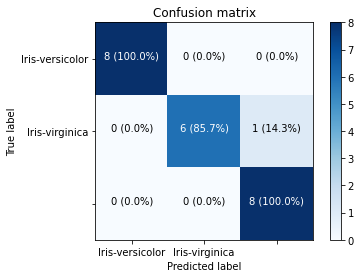

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.86      0.92         7
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23



In [42]:
# Classification report
plot_confusion_matrix(y_true=y_test, y_pred=pred_test, classes=classes)
print (classification_report(y_test, pred_test))

# Inference

In [43]:
# Inputs for inference
X_infer = pd.DataFrame([{'SepalLengthCm': 5.4, 'SepalWidthCm': 3.1, 'PetalLengthCm' : 2.6, 'PetalWidthCm' : 0.2}])
X_infer.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.4,3.1,2.6,0.2


In [44]:
# Standardize
X_infer = ss.transform(X_infer)
print (X_infer)

[[-0.55446049  0.11220014 -0.6467763  -1.28385425]]


In [45]:
# Predict
y_infer = model(torch.Tensor(X_infer), apply_softmax=True)
prob, _class = y_infer.max(dim=1)
print (f"This is a {classes[_class.detach().numpy()[0]]} flower")

This is a Iris-setosa flower
